In [2]:
from dataloaders.crnn_dataloader import *
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
from draw_rna.ipynb_draw import draw_struct

In [2]:
train_df = pd.read_csv("DATA/train_data.csv")
test_df = pd.read_csv("DATA/test_sequences.csv")

## Visualize dataframe for train and test data

In [3]:
train_df.head(5)

,sequence_id,sequence,experiment_type,dataset_name,reads,signal_to_noise,SN_filter,reactivity_0001,reactivity_0002,reactivity_0003,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
0,8cdfeef009ea,GGGAACGACUCGAGUAGAGUCGAAAAACGUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,2343,0.944,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51e61fbde94d,GGGAACGACUCGAGUAGAGUCGAAAAACAUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,5326,1.933,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25ce8d5109cd,GGGAACGACUCGAGUAGAGUCGAAAAACCUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,4647,2.347,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07dcfb6d1965,GGGAACGACUCGAGUAGAGUCGAAAAACUUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,102843,11.824,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e561cc042a4c,GGGAACGACUCGAGUAGAGUCGAAAAACGAUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,7665,3.519,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test_df.head(5)

,id_min,id_max,sequence_id,sequence,future
0,0,176,eee73c1836bc,GGGAACGACUCGAGUAGAGUCGAAAAUUUCCUUCCAAAUCCUGAGG...,0
1,177,353,d2a929af7a97,GGGAACGACUCGAGUAGAGUCGAAAAUGUAAUCAGAUUGCUUCUCC...,0
2,354,530,d39a4425ff45,GGGAACGACUCGAGUAGAGUCGAAAAAACACAUGAAUUUGAGGGUU...,0
3,531,707,1fc41e92d553,GGGAACGACUCGAGUAGAGUCGAAAAUCAGAGCUGGCAAAUGGAUG...,0
4,708,884,1d0826fb892f,GGGAACGACUCGAGUAGAGUCGAAAAUUUGGUAUUUGAUGCAUUAA...,0


## Train distribution per marker 2A3 or DMS

In [5]:
COLOR_2A3 = 'powderblue'
COLOR_DMS = 'lightcoral'

In [6]:
length_2a3 = len(train_df[train_df["experiment_type"] == "2A3_MaP"])

In [7]:
length_dms = len(train_df[train_df["experiment_type"] == "DMS_MaP"])

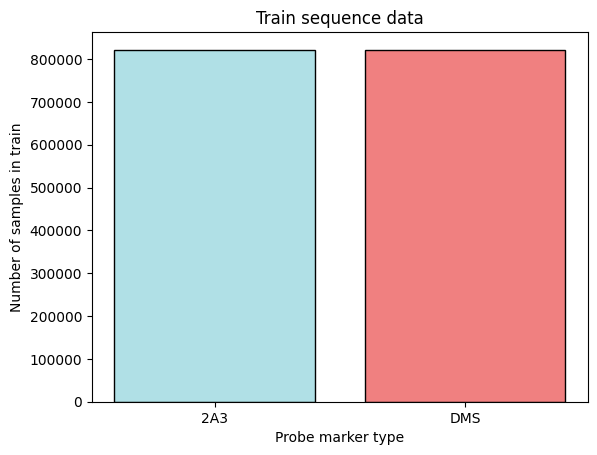

In [8]:
plt.bar(["2A3", "DMS"], height=[length_2a3, length_dms], color=[COLOR_2A3, COLOR_DMS], edgecolor="black")
plt.title("Train sequence data")
plt.xlabel("Probe marker type")
plt.ylabel("Number of samples in train")
plt.show()

## Reads vs signal to noise ratio

In [9]:
# compare signal noise ratio between different experiment types 

train_2a3_df = train_df[train_df["experiment_type"] == "2A3_MaP"]
train_dms_df = train_df[train_df["experiment_type"] == "DMS_MaP"]

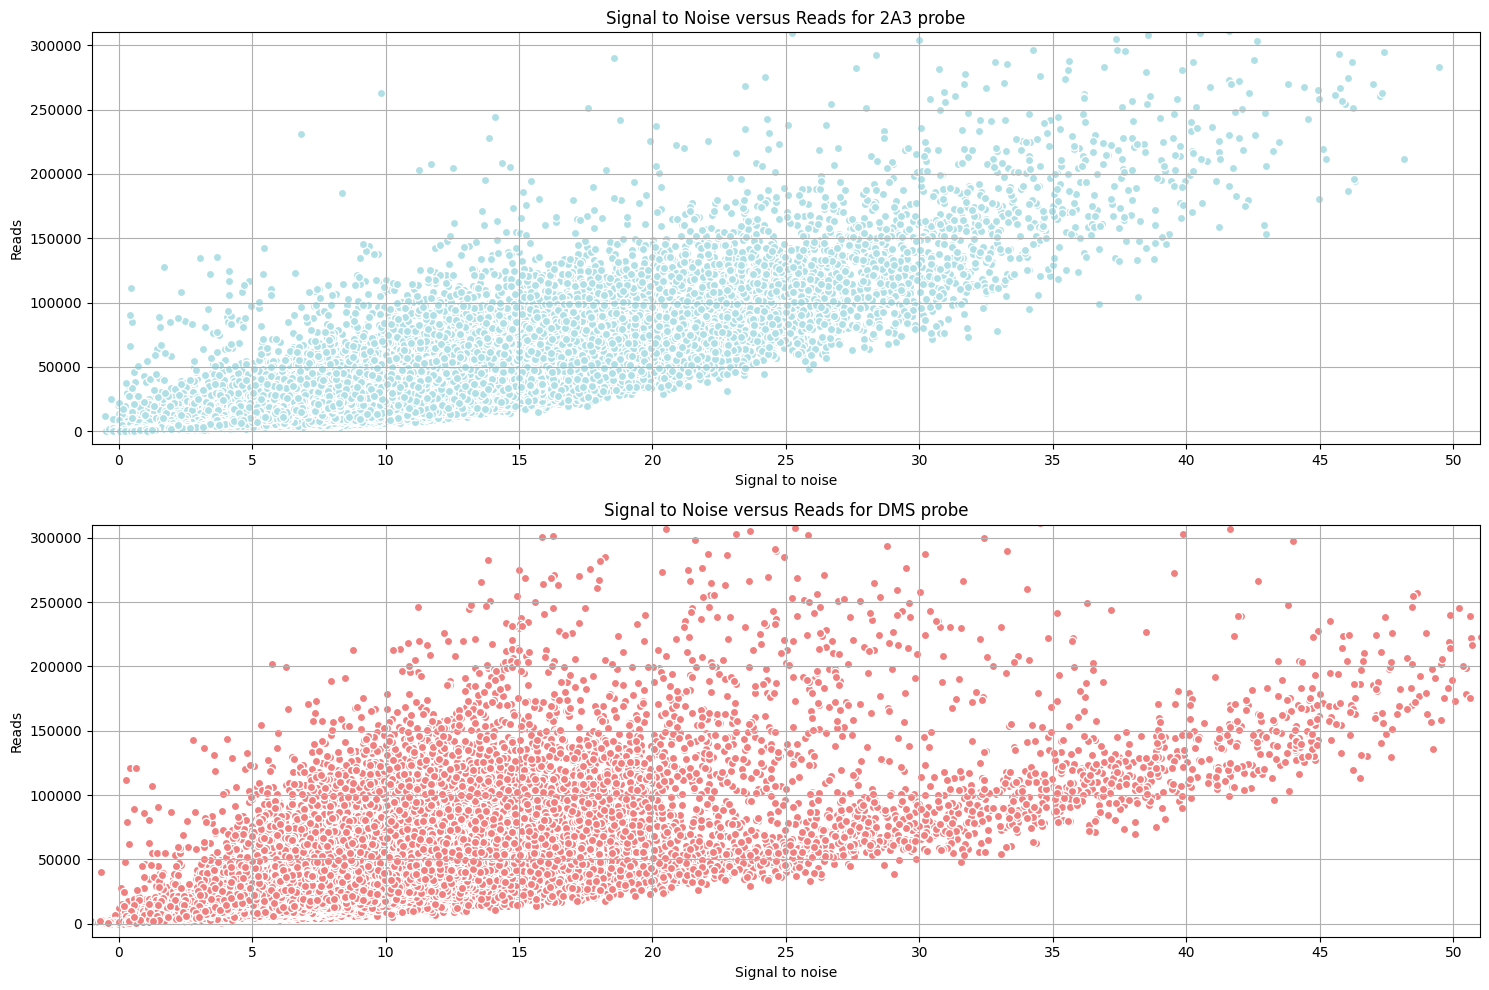

In [10]:

plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# First subplot
plt.subplot(2, 1, 1)  # 1 row, 2 columns, select the first subplot
plt.scatter(train_2a3_df.signal_to_noise, train_2a3_df.reads, edgecolors='white', c=COLOR_2A3)
plt.xlim(-1, 51)  # Adjust the x-axis range to include a small gap
plt.ylim(-10000, 310000)
plt.title('Signal to Noise versus Reads for 2A3 probe')
plt.xlabel('Signal to noise')
plt.ylabel('Reads')
plt.grid(True)  # Add grid lines
plt.xticks(range(0, 51, 5))

# Second subplot
plt.subplot(2, 1, 2)  # 1 row, 2 columns, select the second subplot
plt.scatter(train_dms_df.signal_to_noise, train_dms_df.reads, edgecolors='white', c=COLOR_DMS)
plt.xlim(-1, 51)  # Adjust the x-axis range to include a small gap
plt.ylim(-10000, 310000)
plt.title('Signal to Noise versus Reads for DMS probe')
plt.xlabel('Signal to noise')
plt.ylabel('Reads')
plt.grid(True)  # Add grid lines
plt.xticks(range(0, 51, 5))

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Number of sequences with signal-to-noise > 1 and reads > 100

In [11]:
# compare number of sequences with SN filter = 1 vs SN filter = 0

train_2a3_SN_1 = len(train_2a3_df[train_2a3_df["SN_filter"] == 1])
train_2a3_SN_0 = len(train_2a3_df[train_2a3_df["SN_filter"] == 0])

train_dms_SN_1 = len(train_dms_df[train_dms_df["SN_filter"] == 1])
train_dms_SN_0 = len(train_dms_df[train_dms_df["SN_filter"] == 0])

train_2a3_SN = [train_2a3_SN_0, train_2a3_SN_1]
train_dms_SN = [train_dms_SN_0, train_dms_SN_1]

# Calculate percentages
total_train_2a3_SN = sum(train_2a3_SN)
total_train_dms_SN = sum(train_dms_SN)

percent_train_2a3_SN = [count / total_train_2a3_SN * 100 for count in train_2a3_SN]
percent_train_dms_SN = [count / total_train_dms_SN * 100 for count in train_dms_SN]


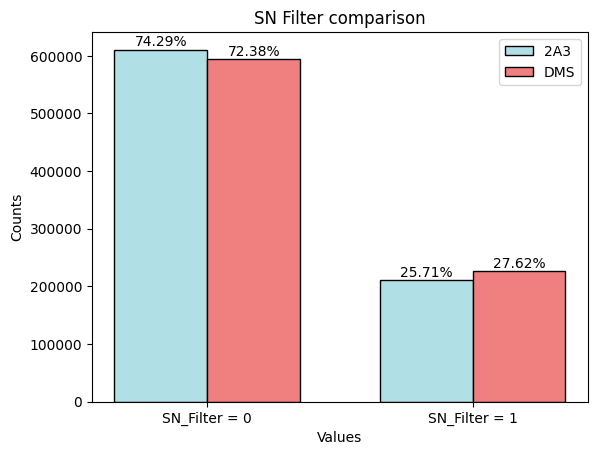

In [12]:
width = 0.35  # the width of the bars
labels = ['SN_Filter = 0', 'SN_Filter = 1']
x = range(len(labels))


fig, ax = plt.subplots()

bar1 = ax.bar(x, train_2a3_SN, width, label='2A3', color=COLOR_2A3, edgecolor='black')
bar2 = ax.bar([i + width for i in x], train_dms_SN, width, label='DMS', color=COLOR_DMS, edgecolor='black')

# Add labels, title, and legend
ax.set_xlabel('Values')
ax.set_ylabel('Counts')
ax.set_title('SN Filter comparison')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

# Display percentages on top of the bars
for i, count in enumerate(train_2a3_SN):
    plt.text(i, count + 0.1 * (max(train_2a3_SN) - 550000), f'{percent_train_2a3_SN[i]:.2f}%', ha='center')

for i, count in enumerate(train_dms_SN):
    plt.text(i + width, count + 0.1 * (max(train_dms_SN) - 550000), f'{percent_train_dms_SN[i]:.2f}%', ha='center')

# Show the plot
plt.show()

## Metrics for 2A3 and DMS 

In [13]:
train_2a3_df[['reads', 'signal_to_noise']].describe()

,reads,signal_to_noise
count,8.218400e+05,821840.000000
mean,2.147050e+03,1.181102
std,1.770245e+04,2.734673
min,0.000000e+00,-0.523000
25%,3.700000e+01,0.092000
50%,1.370000e+02,0.356000
75%,5.070000e+02,1.034000
max,6.170000e+06,232.683000


In [14]:
train_dms_df[['reads', 'signal_to_noise']].describe()

,reads,signal_to_noise
count,8.218400e+05,821840.000000
mean,2.313897e+03,1.207687
std,2.921483e+04,2.658501
min,0.000000e+00,-1.672000
25%,4.800000e+01,0.128000
50%,1.590000e+02,0.409000
75%,5.450000e+02,1.129000
max,1.474813e+07,256.371000


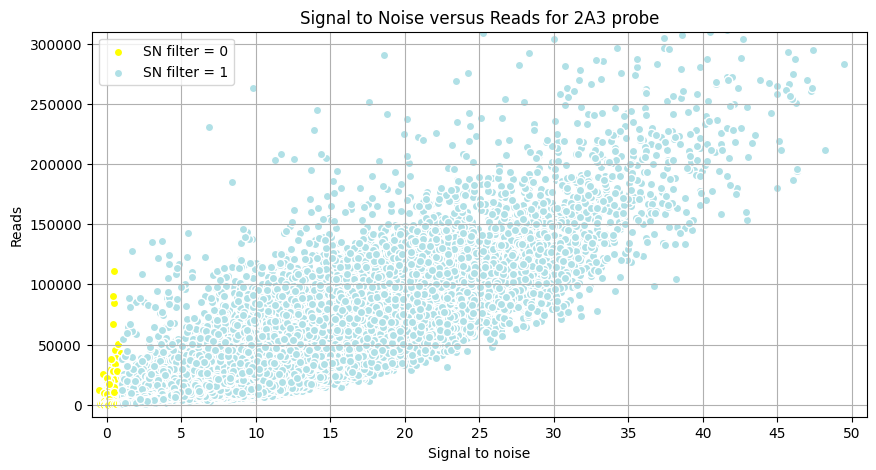

In [15]:

# plt.figure(figsize=(20, 5))  # Adjust the figure size as needed

# # First subplot
# #plt.subplot(1, 2, 1)  # 1 row, 2 columns, select the first subplot
# plt.scatter(train_2a3_df.signal_to_noise, train_2a3_df.reads, edgecolors='white', c=train_2a3_df['SN_filter'].map({0: 'yellow', 1: COLOR_2A3}))
# plt.xlim(-1, 51)  # Adjust the x-axis range to include a small gap
# plt.ylim(-10000, 310000)
# plt.title('Signal to Noise versus Reads for 2A3 probe')
# plt.xlabel('Signal to noise')
# plt.ylabel('Reads')
# plt.grid(True)  # Add grid lines
# plt.xticks(range(0, 51, 5))
# plt.show()



# plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

# # First subplot
# #plt.subplot(1, 2, 1)  # 1 row, 2 columns, select the first subplot
# yellow_points = plt.scatter(train_2a3_df.signal_to_noise, train_2a3_df.reads, edgecolors='white', c=train_2a3_df['SN_filter'].map({0: 'yellow', 1: COLOR_2A3}), label='SN filter = 0')
# plt.xlim(-1, 51)  # Adjust the x-axis range to include a small gap
# plt.ylim(-10000, 310000)
# plt.title('Signal to Noise versus Reads for 2A3 probe')
# plt.xlabel('Signal to noise')
# plt.ylabel('Reads')
# plt.grid(True)  # Add grid lines
# plt.xticks(range(0, 51, 5))

# # Add legend
# plt.legend()

# plt.show()

plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

# First subplot
#plt.subplot(1, 2, 1)  # 1 row, 2 columns, select the first subplot
yellow_points = plt.scatter(train_2a3_df[train_2a3_df['SN_filter'] == 0].signal_to_noise, train_2a3_df[train_2a3_df['SN_filter'] == 0].reads, edgecolors='white', c='yellow', label='SN filter = 0')
other_points = plt.scatter(train_2a3_df[train_2a3_df['SN_filter'] == 1].signal_to_noise, train_2a3_df[train_2a3_df['SN_filter'] == 1].reads, edgecolors='white', c=COLOR_2A3, label='SN filter = 1')

plt.xlim(-1, 51)  # Adjust the x-axis range to include a small gap
plt.ylim(-10000, 310000)
plt.title('Signal to Noise versus Reads for 2A3 probe')
plt.xlabel('Signal to noise')
plt.ylabel('Reads')
plt.grid(True)  # Add grid lines
plt.xticks(range(0, 51, 5))

# Add legend
plt.legend()

plt.show()



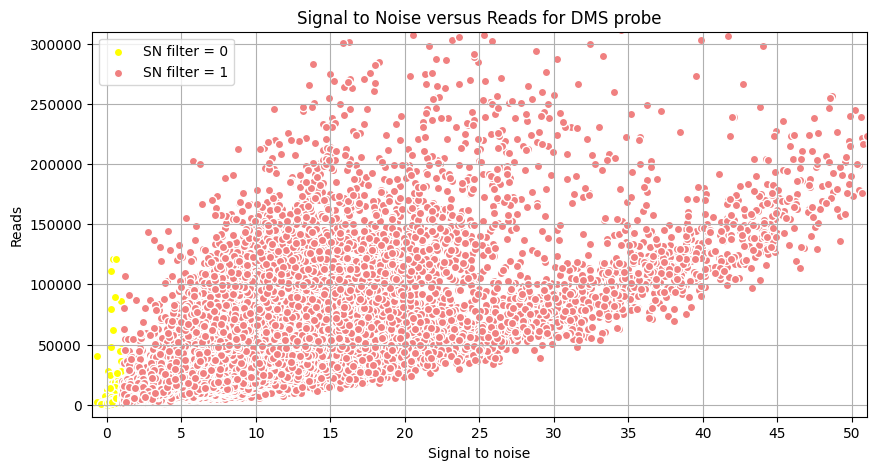

In [16]:
# plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
# # Second subplot
# #plt.subplot(1, 2, 2)  # 1 row, 2 columns, select the second subplot
# plt.scatter(train_dms_df.signal_to_noise, train_dms_df.reads, edgecolors='white', c=train_2a3_df['SN_filter'].map({0: 'yellow', 1: COLOR_DMS}), label='SN filter = 0')
# plt.xlim(-1, 51)  # Adjust the x-axis range to include a small gap
# plt.ylim(-10000, 310000)
# plt.title('Signal to Noise versus Reads for DMS probe')
# plt.xlabel('Signal to noise')
# plt.ylabel('Reads')
# plt.grid(True)  # Add grid lines
# plt.xticks(range(0, 51, 5))
# plt.legend()
# #plt.tight_layout()  # Adjust layout for better spacing
# plt.show()

plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
# Second subplot
#plt.subplot(1, 2, 2)  # 1 row, 2 columns, select the second subplot

yellow_points = plt.scatter(train_dms_df[train_dms_df['SN_filter'] == 0].signal_to_noise, train_dms_df[train_dms_df['SN_filter'] == 0].reads, edgecolors='white', c='yellow', label='SN filter = 0')
other_points = plt.scatter(train_dms_df[train_dms_df['SN_filter'] == 1].signal_to_noise, train_dms_df[train_dms_df['SN_filter'] == 1].reads, edgecolors='white', c=COLOR_DMS, label='SN filter = 1')

plt.xlim(-1, 51)  # Adjust the x-axis range to include a small gap
plt.ylim(-10000, 310000)
plt.title('Signal to Noise versus Reads for DMS probe')
plt.xlabel('Signal to noise')
plt.ylabel('Reads')
plt.grid(True)  # Add grid lines
plt.xticks(range(0, 51, 5))

# Add legend
plt.legend()

plt.show()


## Sequence length vs reactivity 

In [17]:
train_2a3_df.loc[:, "reactivity_0001":"reactivity_0206"].head()

,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,reactivity_0009,reactivity_0010,...,reactivity_0197,reactivity_0198,reactivity_0199,reactivity_0200,reactivity_0201,reactivity_0202,reactivity_0203,reactivity_0204,reactivity_0205,reactivity_0206
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
reactivity_2a3 = train_2a3_df.loc[:, "reactivity_0001":"reactivity_0206"]
reactivity_dms = train_dms_df.loc[:, "reactivity_0001":"reactivity_0206"]

In [19]:
reactivity_2a3.head()

,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,reactivity_0009,reactivity_0010,...,reactivity_0197,reactivity_0198,reactivity_0199,reactivity_0200,reactivity_0201,reactivity_0202,reactivity_0203,reactivity_0204,reactivity_0205,reactivity_0206
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# # data_without_nan = reactivity_dms.stack().dropna().values

# # Create histogram
# hist, bins = np.histogram(data_without_nan, bins=206)
# plt.figure(figsize=(15, 5))
# plt.hist(hist, bins=bins, edgecolor='black', log=True, rwidth=5, color=COLOR_DMS)
# plt.xlim(0, reactivity_2a3.shape[1])
# # plt.xticks(np.arange(0, 206) + 1)
# plt.title('Histogram of reactivity values across DMS probed train data')
# plt.xlabel('Sequence positions')
# plt.ylabel('Frequency')


# data_without_nan = reactivity_2a3.stack().dropna().values
# # Create histogram
# hist, _ = np.histogram(data_without_nan, bins=206)
# plt.figure(figsize=(15, 5))
# plt.hist(hist, bins=bins, edgecolor='black', log=True, rwidth=5, color=COLOR_2A3)
# plt.xlim(0, reactivity_2a3.shape[1])
# # plt.xticks(np.arange(0, 206) + 1)
# plt.title('Histogram of reactivity values across 2A3 probed train data')
# plt.xlabel('Sequence positions')
# plt.ylabel('Frequency')




# plt.show()


## Mean distribution for reactivity across sequence length 

In [22]:
np_reactivity_2a3 = reactivity_2a3.to_numpy()
np_reactivity_dms = reactivity_dms.to_numpy()
count_2a3 = np_reactivity_2a3.shape[0] - np.sum(np.isnan(np_reactivity_2a3), axis=0)
count_dms = np_reactivity_dms.shape[0] - np.sum(np.isnan(np_reactivity_dms), axis=0)

sum_reactivity_2a3 = np.sum(np.nan_to_num(np_reactivity_2a3, nan=0), axis=0)
sum_reactivity_dms = np.sum(np.nan_to_num(np_reactivity_dms, nan=0), axis=0)

mean_reactivity_2a3 = sum_reactivity_2a3/count_2a3
mean_reactivity_dms = sum_reactivity_dms/count_dms

C:\Users\Raj\AppData\Local\Temp\ipykernel_18632\3379224499.py:9: RuntimeWarning: invalid value encountered in divide
  mean_reactivity_2a3 = sum_reactivity_2a3/count_2a3
C:\Users\Raj\AppData\Local\Temp\ipykernel_18632\3379224499.py:10: RuntimeWarning: invalid value encountered in divide
  mean_reactivity_dms = sum_reactivity_dms/count_dms


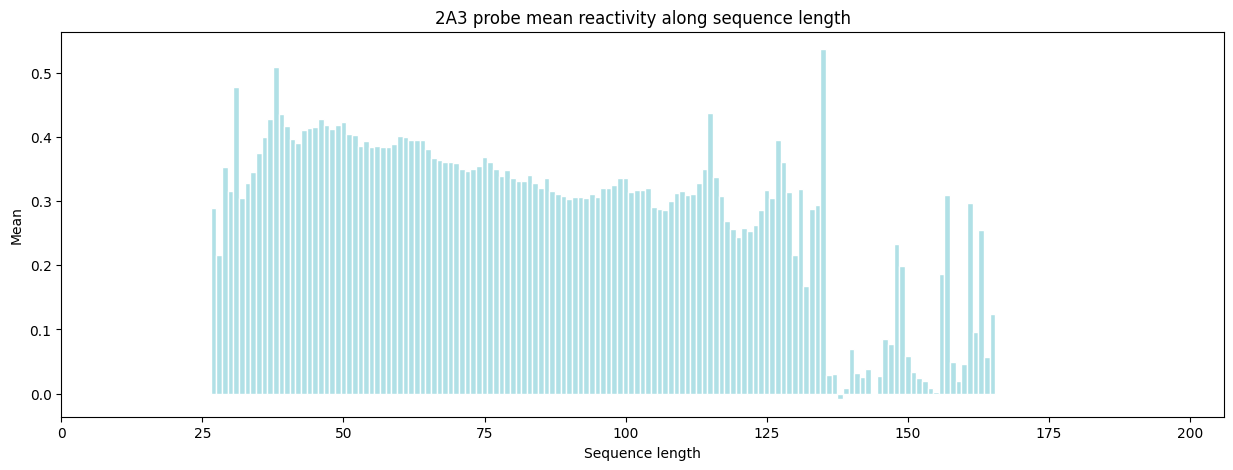

In [23]:
plt.figure(figsize=(15, 5))
plt.bar(height=mean_reactivity_2a3, x=np.arange(1, 207), color=COLOR_2A3, edgecolor="white", width=1)
plt.title("2A3 probe mean reactivity along sequence length")
plt.xlabel("Sequence length")
plt.ylabel("Mean")
plt.xlim(0, 206)
plt.show()

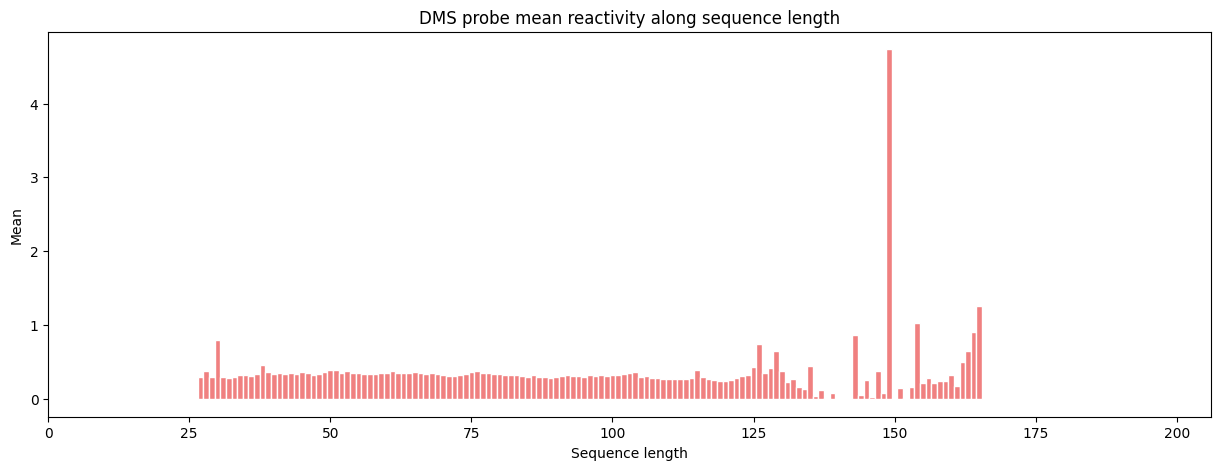

In [24]:
plt.figure(figsize=(15, 5))
plt.bar(height=mean_reactivity_dms, x=np.arange(1, 207), color=COLOR_DMS, edgecolor="white", width=1)
plt.title("DMS probe mean reactivity along sequence length")
plt.xlabel("Sequence length")
plt.ylabel("Mean")
plt.xlim(0, 206)
plt.show()

In [25]:
mean_reactivity_2a3

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,  0.2887019 ,  0.21522918,  0.35324105,  0.31555809,
        0.47806826,  0.30397494,  0.3276429 ,  0.34565504,  0.37561961,
        0.39940649,  0.42708596,  0.50891827,  0.43576768,  0.41732621,
        0.39675688,  0.39109626,  0.41034786,  0.41354559,  0.41582789,
        0.42752424,  0.41881979,  0.41273146,  0.4184405 ,  0.422542  ,
        0.40479405,  0.40274012,  0.38608708,  0.39365091,  0.38410358,
        0.38528   ,  0.38412662,  0.38349572,  0.38910151,  0.40133845,
        0.39967821,  0.39585281,  0.39477559,  0.39542208,  0.38114424,
        0.36731359,  0.36343718,  0.36054437,  0.36128901,  0.35

In [26]:
mean_reactivity_dms

array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,  2.96107266e-01,  3.74168730e-01,
        2.92829832e-01,  8.03967926e-01,  2.91533640e-01,  2.85210053e-01,
        3.00276332e-01,  3.22725003e-01,  3.28609316e-01,  3.11406981e-01,
        3.34758123e-01,  4.60460263e-01,  3.59325356e-01,  3.39802386e-01,
        3.43660671e-01,  3.33548726e-01,  3.44486392e-01,  3.42673112e-01,
        3.65825280e-01,  3.49088486e-01,  3.28507130e-01,  3.34355999e-01,
        3.66734202e-01,  3.89791697e-01,  3.84813666e-01,  3.55271247e-01,
        3.71204900e-01,  

In [27]:
np.argmax(np.nan_to_num(mean_reactivity_dms))

148

In [28]:
reactivity_dms.iloc[:, 146:]

,reactivity_0147,reactivity_0148,reactivity_0149,reactivity_0150,reactivity_0151,reactivity_0152,reactivity_0153,reactivity_0154,reactivity_0155,reactivity_0156,...,reactivity_0197,reactivity_0198,reactivity_0199,reactivity_0200,reactivity_0201,reactivity_0202,reactivity_0203,reactivity_0204,reactivity_0205,reactivity_0206
15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643675,-0.022,0.165,15.026,-0.156,0.233,0.037,0.520,1.365,-0.200,0.054,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1643676,0.090,0.121,12.188,-0.032,0.280,-0.008,0.231,1.133,0.033,0.155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1643677,0.301,0.193,12.518,-0.065,-0.081,0.290,0.343,1.177,-0.149,0.437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1643678,-0.009,0.178,13.436,-0.136,0.256,0.076,0.188,1.086,-0.003,0.350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot reactivity per sequence 

In [29]:
def plot_multiple_histograms(df, selected_rows, num_graphs_per_row=5, color="blue"):
    # Create subplots
    num_rows = len(selected_rows) // num_graphs_per_row + (len(selected_rows) % num_graphs_per_row > 0)
    fig, axs = plt.subplots(num_rows, num_graphs_per_row, figsize=(20, 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust vertical space between subplots
    
    for i, ax_row in enumerate(axs):
        for j, ax in enumerate(ax_row):
            graph_index = i * num_graphs_per_row + j
            if graph_index < len(selected_rows):
                index = selected_rows[graph_index]
                
                # Extract data without NaN values
                data_without_nan = df.iloc[index].dropna()
                
                # Plot histogram
                ax.hist(data_without_nan, bins=30, edgecolor='black', color=color)
                ax.set_title(f'reactivity_00{index + 1}')
                # ax.set_xlabel('Values')
                # ax.set_ylabel('Frequency')
    
    plt.show()

In [30]:
def plot_multiple_lineplots(df, user_indices, num_graphs_per_row=5, line_color='blue'):
    fig, axs = plt.subplots(len(user_indices) // num_graphs_per_row, num_graphs_per_row, figsize=(20, 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust vertical and horizontal space between subplots
    
    for i in range(len(user_indices) // num_graphs_per_row):
        for j in range(num_graphs_per_row):
            index = user_indices[i * num_graphs_per_row + j]
            data_without_nan = df.iloc[index].dropna()
            
            ax = axs[i, j]
            ax.plot(data_without_nan, marker='', linestyle='-', color=line_color, linewidth=1)
            ax.set_title(f'reactivity_00{index + 1}')
            # ax.set_xlabel('Index')
            # ax.set_ylabel('Values')
            xticks = np.linspace(1, len(data_without_nan), 10, dtype=int)
            ax.set_xticks(xticks)
            
            # Rotate x-axis tick labels for better readability
            ax.set_xticklabels(xticks)
            
            # Control the number of ticks on the x-axis
            ax.xaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))
            
    plt.show()

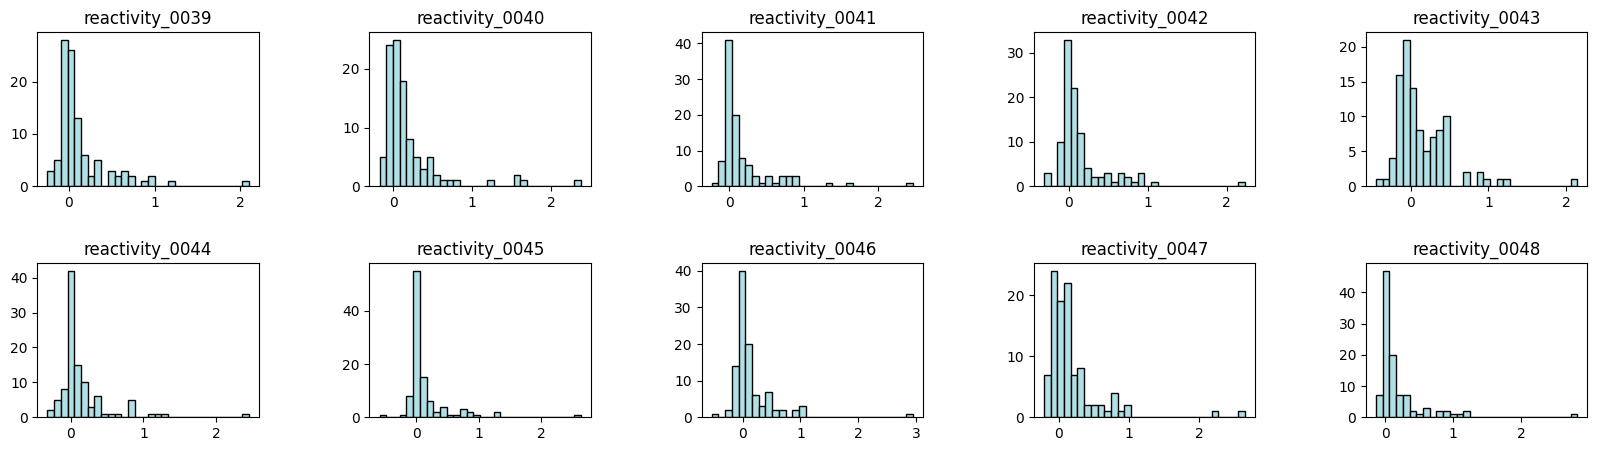

In [31]:
selected_rows = list(np.arange(38, 48))
plot_multiple_histograms(reactivity_2a3, selected_rows, num_graphs_per_row=5, color=COLOR_2A3)

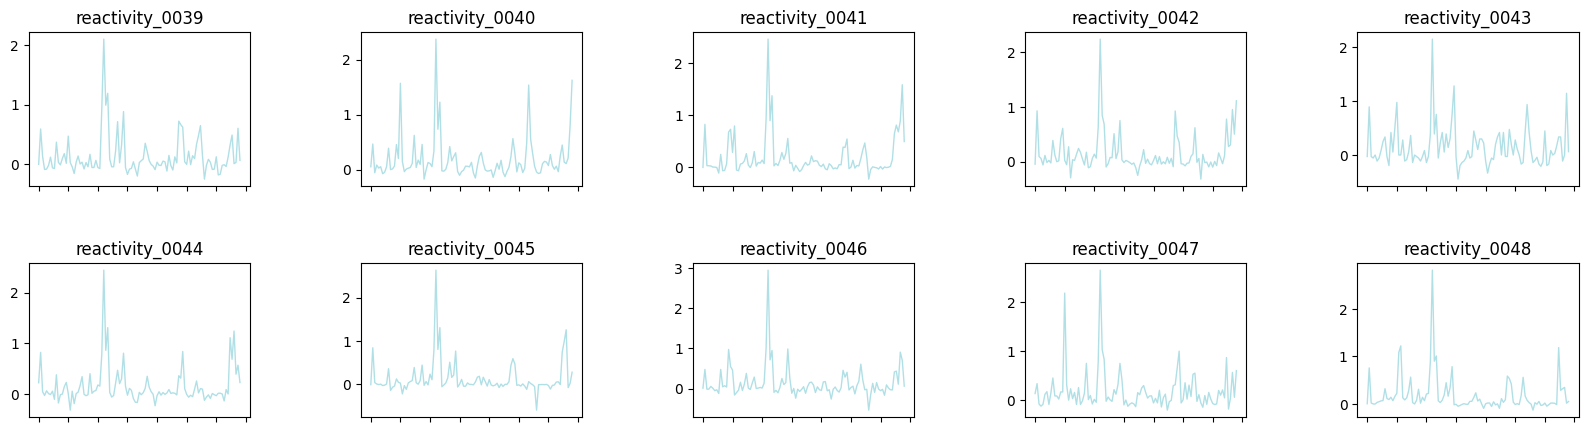

In [32]:
user_defined_indices = list(np.arange(38, 48))
plot_multiple_lineplots(reactivity_2a3, user_defined_indices, num_graphs_per_row=5, line_color=COLOR_2A3)

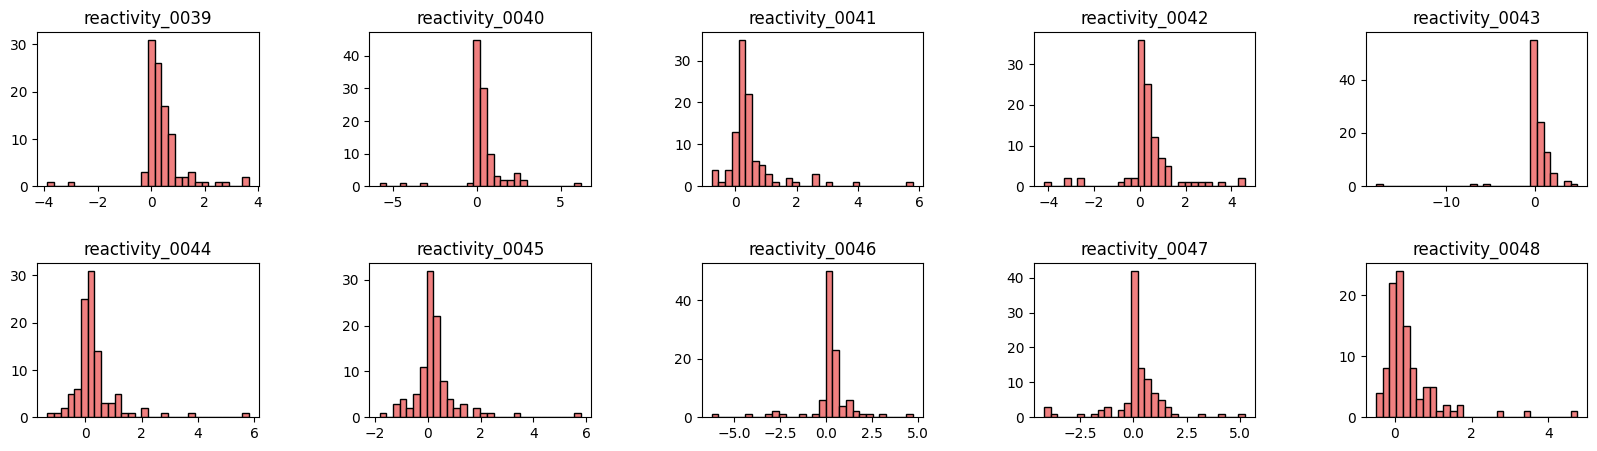

In [33]:
selected_rows = list(np.arange(38, 48))
plot_multiple_histograms(reactivity_dms, selected_rows, num_graphs_per_row=5, color=COLOR_DMS)

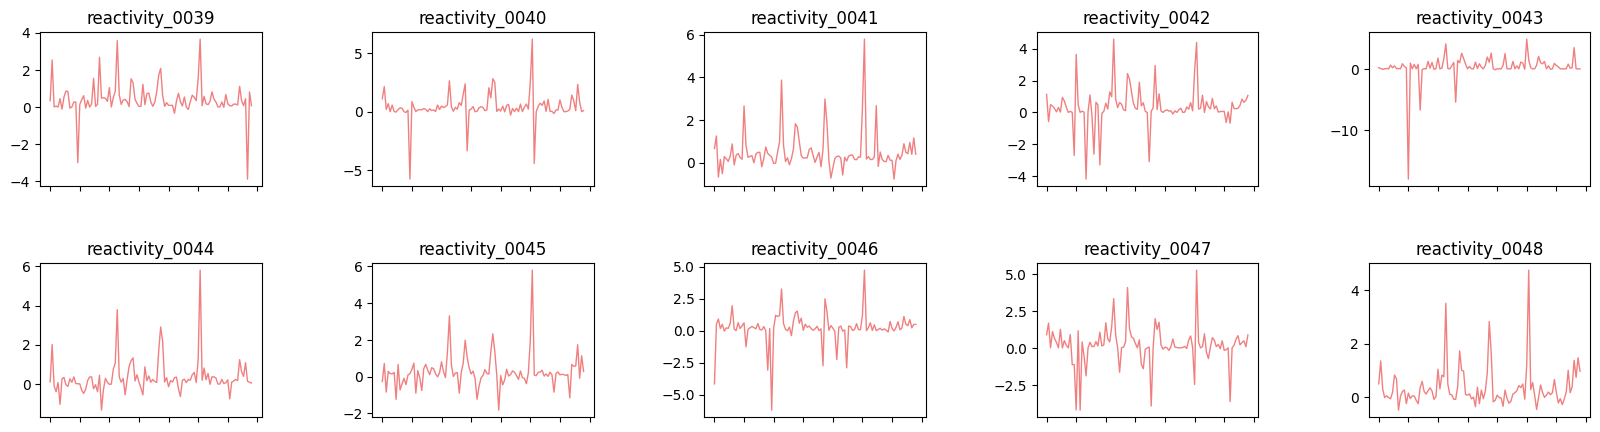

In [34]:
user_defined_indices = list(np.arange(38, 48))
plot_multiple_lineplots(reactivity_dms, user_defined_indices, num_graphs_per_row=5, line_color=COLOR_DMS)

## Secondary Structures

In [35]:
SILICO_CSVS = DATA_DIR + '/' + 'supplementary_silico_predictions'

gpn15k = pd.read_csv(f"{SILICO_CSVS}/GPN15k_silico_predictions.csv")
pk50 = pd.read_csv(f"{SILICO_CSVS}/PK50_silico_predictions.csv")
pk90 = pd.read_csv(f"{SILICO_CSVS}/PK90_silico_predictions.csv")
r1 = pd.read_csv(f"{SILICO_CSVS}/R1_silico_predictions.csv")

C:\Users\Raj\AppData\Local\Temp\ipykernel_18632\1931744445.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  r1 = pd.read_csv(f"{SILICO_CSVS}/R1_silico_predictions.csv")


(((((((((((.....))))))......)))))...........((((((((((.((......)).))))))))))(((((((....))))))).....................
GGGAACGACUCGAGUAGAGUCGAAAACAUUCCCAAAUUCCACCUUGGUGAUGGCACCCGGAGAGGAGCCAUCACCACACAAAUUUCGAUUUGUGAAAAGAAACAACAACAACAAC


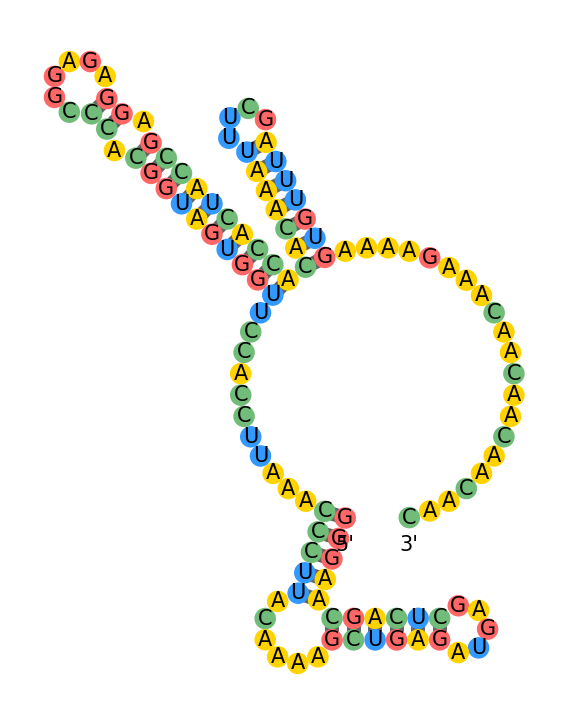

In [36]:
print(pk50.iloc[0]['vienna2_mfe'])
print(pk50.iloc[0]['sequence'])
draw_struct(pk50.iloc[0]['sequence'], pk50.iloc[0]['vienna2_mfe'], cmap='rdbu')

.....((((((.....))))))....................(((((((((.((.........)).))))))))).(((((((....))))))).....................
GGGAACGACUCGAGUAGAGUCGAAAACAGCUUACGAGAUUCAGUUAUCGAGAGAUUAAGAGAUUCGCUCGAUAACAUCAAAAGUUCGCUUUUGAAAAAGAAACAACAACAACAAC


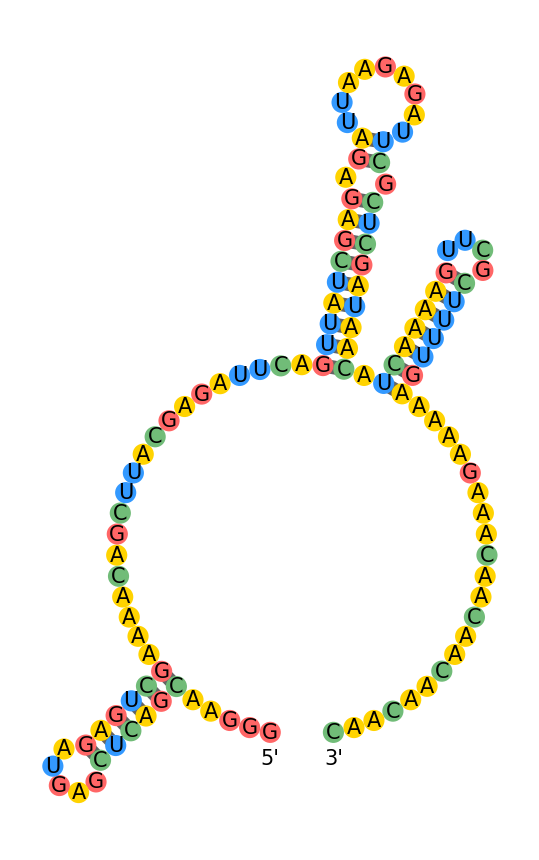

In [37]:
print(pk50.iloc[5]['vienna2_mfe'])
print(pk50.iloc[5]['sequence'])
draw_struct(pk50.iloc[5]['sequence'], pk50.iloc[5]['vienna2_mfe'], cmap='rdbu')

.....((((((.....)))))).....(((((((((.(((((..((.((((((....)))))).))..))).)).)))))....))))...........................
GGGAACGACUCGAGUAGAGUCGAAAAGGCGGCGAGUAUCGCUUAGCGGCGCGCUACAGCGCGCAGCGCAGCUGGAACUCGAUGUUCGCGUCGGGAAAAGAAACAACAACAACAAC


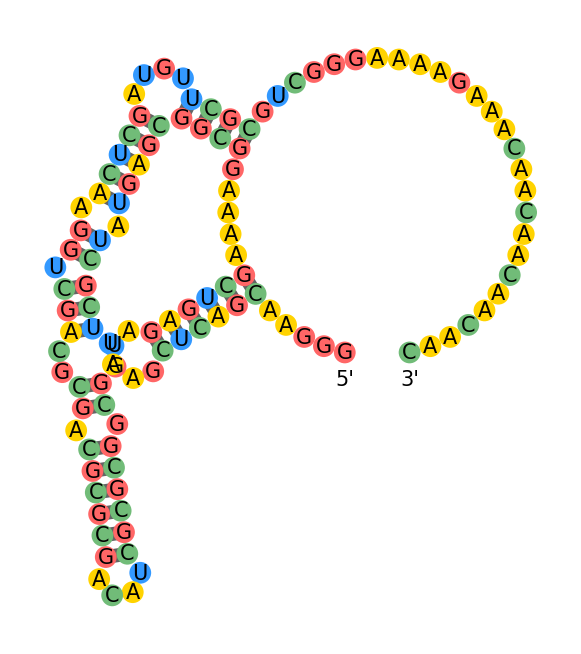

In [38]:
print(pk50.iloc[10]['vienna2_mfe'])
print(pk50.iloc[10]['sequence'])
draw_struct(pk50.iloc[10]['sequence'], pk50.iloc[10]['vienna2_mfe'], cmap='rdbu')

## Reactivity column occupancy

In [70]:
reactivity_df = train_df.loc[:, "reactivity_0001":"reactivity_0206"]

In [76]:
column_null_count = (np.isnan(reactivity_df.to_numpy()).sum(axis=0) == reactivity_df.shape[0]).sum()
row_null_count = (np.isnan(reactivity_df.to_numpy()).sum(axis=1) == reactivity_df.shape[1]).sum()

In [77]:
row_null_count

81480

In [65]:
column_null_count

81480

In [67]:
np.isnan(reactivity_df.to_numpy()).sum(axis=1).shape

(1643680,)

In [75]:
(np.sum(np.nan_to_num(reactivity_df.to_numpy()), axis=0) == 0).sum()

67

## Base Pair probability

In [56]:
def load_bpp_to_tensor_new(bpp_file):
        data = torch.from_numpy(np.loadtxt(bpp_file).T)
        init = torch.zeros(160, 170, dtype=torch.float64)
        x = (data[1] - 1).to(torch.int64)
        y = (data[0] - 1).to(torch.int64)
        init[y, x] = data[2]
        return init.to(torch.float32)

In [6]:
bpp = pd.read_csv("DATA/preprocessed/p_bpp.csv")

In [57]:
bpp_one = load_bpp_to_tensor_new(bpp_file=bpp["path"][0])

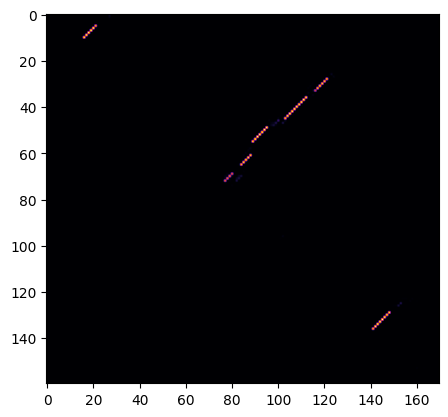

In [58]:
plt.imshow(bpp_one, cmap="inferno")

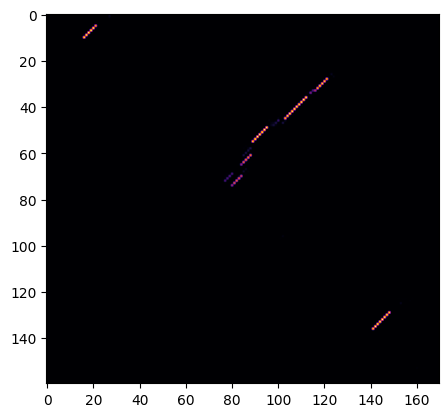

In [61]:
bpp_one = load_bpp_to_tensor_new(bpp_file=bpp["path"][10])
plt.imshow(bpp_one, cmap="inferno")

### EdgecNN, MAE amd Loss validation

In [9]:
def plot_csv_values(path_dms, path_2a3, title, save_path):
    # Read CSV files into pandas DataFrames
    COLOR_2A3 = 'powderblue'
    COLOR_DMS = 'lightcoral'
    df1 = pd.read_csv(path_dms)
    df2 = pd.read_csv(path_2a3)

    # Extract 'Step' and 'Value' columns
    step_col1, value_col1 = df1['Step'], df1['Value']
    step_col2, value_col2 = df2['Step'], df2['Value']

    # Plotting
    plt.plot(step_col1, value_col1, label='dms', color=COLOR_DMS)
    plt.plot(step_col2, value_col2, label='2a3', color= COLOR_2A3)

    # Set x-axis limits to the maximum value of 'Step' column
    max_step = max(df1['Step'].max(), df2['Step'].max())
    min_step = min(df1['Step'].min(), df2['Step'].min())
    print(min_step)

    plt.xlim(0, max_step)

    # Add labels and title
    plt.xlabel('Step')
    plt.ylabel('Value')
    plt.title(title)

    # Add legend
    plt.legend()
    plt.savefig(save_path)

    # Show the plot
    plt.show()

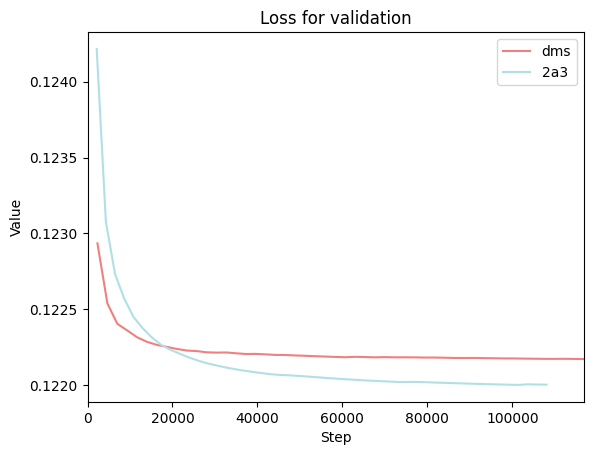

In [6]:
plot_csv_values('../report_images/edgecnn/loss/edgecnn_dms_50_epoch_edgecnn_1.csv', '../report_images/edgecnn/loss/edgecnn_2a3_50_epoch_edgecnn_1.csv', 'Loss for validation', '../report_images/edgecnn/loss/validation_loss.png')

2160


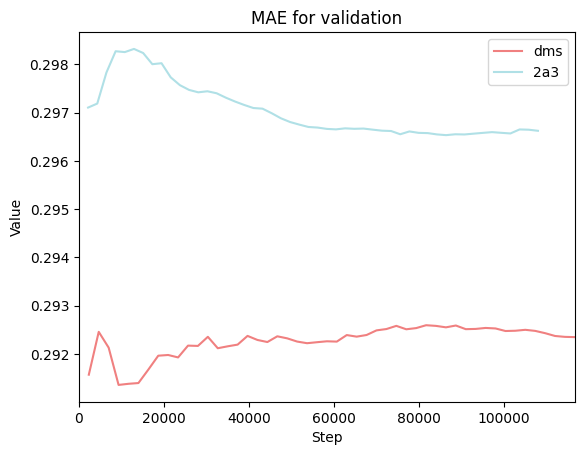

In [10]:
plot_csv_values('../report_images/edgecnn/mae/edgecnn_dms_50_epoch_edgecnn_1.csv', '../report_images/edgecnn/mae/edgecnn_2a3_50_epoch_edgecnn_1.csv', 'MAE for validation', '../report_images/edgecnn/mae/validation_mae.png')